---
# <span style="color:pink">DS3000B - DS9000B Midterm Exam</span>

## <span style="color:pink">Student ID #: _________</span>

## <span style="color:pink">Grade: __ / 100</span>

## <span style="color:pink">General Comments</span>

- This exam integrates knowledge and skills acquired in the first half of the term.

- Using AI agents/chatbots such as ChatGPT and Copilot is considered an act of cheating and you will receive 0 mark for the exam.

- You are allowed to use any other resources on your computer or the internet, but you are **not** allowed to share documents, post questions to forums such as Stack Overflow (this includes use of homework helpers such as Chegg), or communicate in anyway with people inside or outside the exam room.

- Having any communication tools (*e.g.*, Discord, Teams, Slack, Outlook etc.) either web-based or app-based open on your computer (or having them running in the background) is considered an act of cheating and you will receive 0 mark for the exam.

- To finish the midterm in the alloted time, you will have to work efficiently.

- Please read the entirety of each question carefully.

- While the submission window remains open for a longer period of time, but this is your responsibility to make sure that you submit your work by the submission deadline which Accessible Education has set for you. For example, if your accommodation time is 3 hours, you must submit by 7:30pm. Failure to submit by your designated deadline leads to a 0 mark for the exam.

- To avoid technical difficulties at the time of submission, please initiate your submission process at the latest five minutes before the deadline.

- Some questions demand a **written answer**. Please answer these in full English sentences in a markdown cell right underneath the question.

- For your figures ensure that all axes are labeled in an informative way.

- At the end, before submitting to OWL, restart the kernel and rerun all cells to make sure that your notebook runs error free and as expected.

## <span style="color:pink">Additional Guidance</span>

- If at any point you are asking yourself "are we supposed to...", write your assumptions clearly and proceed according to them.

- If you have no clue how to approach a question, skip it, and move on. Revisit the skipped one(s) after you are done with other questions.

- Where applicable, take advantage of the argument `n_jobs=-1` to speed up processes with parallel computing.

- To navigate within the notebook, better to take advantage of the notebook's table of contents (normally on the left side of the screen). It saves you some time compared to pure scrolling with the mouse. In VScode, it is nested under the "OUTLINE" tab which is by default minimized unless you click it to maximize.

- Please ensure that your results are generated using the provided random seed, where applicable.

---
## <span style="color:orange">Toolbox</span>

In [1]:
from datetime import datetime
import numpy as np

seed = 240229
np.random.seed(seed)
import pandas as pd

pd.set_option("display.max_columns", None)
from sklearn.model_selection import (
    cross_val_score,
    KFold,
    StratifiedKFold,
    train_test_split,
)
from sklearn.metrics import (
    auc,
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    accuracy_score,
    ConfusionMatrixDisplay,
)
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

sns.set(style="darkgrid")
sns.set_palette("Spectral")


---
## Question 1 - <span style="color:red">[70]</span> - Classification
For this question you will be working with "Data_Q1.csv", which is a dataset on property price. Below, we provide a detailed description of each variable in the dataset:

|Column Index | Attribute | Description |
| --- | --- | --- |
| 0|ID|Property's identification number|
| 1|MSSubClass|Building class|
| 2|LotArea|Lot size in square feet|
| 3|LandSlope|Slope of property's land|
| 4|HouseStyle|Style of dwelling|
| 5|OverallQual|Overall material and finish quality|
| 6|OverallCond|Overall condition rating|
| 7|YearBuilt|Original construction date|
| 8|MasVnrArea|Masonry veneer walls area in square feet|
| 9|TotalBsmtSF|Total square feet of basement area|
|10|Heating|Type of heating|
|11|CentralAir|Central air conditioning|
|12|1stFlrSF|First Floor square feet|
|13|2ndFlrSF|Second floor square feet|
|14|GrLivArea|Above grade (ground) living area square feet|
|15|FullBath|Full bathrooms above grade|
|16|HalfBath|Half baths above grade|
|17|BedroomAbvGr|Number of bedrooms above basement level|
|18|TotRmsAbvGrd|Total rooms above grade (does not include bathrooms)|
|19|Fireplaces|Number of fireplaces|
|20|GarageCars|Size of garage in car capacity|
|21|GarageArea|Size of garage in square feet|
|22|PavedDrive|Paved driveway|
|23|WoodDeckSF|Wood deck area in square feet|
|24|OpenPorchSF|Open porch area in square feet|
|25|MiscVal|$ value of miscellaneous feature|
|26|YrSold|Year sold|
|27|SalePrice|Sale price in dollars|

### Q1.1 - <span style="color:red">[20]</span> - Data preparation
Load the dataset as a pandas dataframe and perform the following steps:
1. Display its first five rows. <span style="color:green">[2]</span>
2. Print out the number of rows and columns of it? <span style="color:green">[2]</span>
3. Print out the count for each variable type? For example, if you have a dataframe with 5 columns of which 2 are `int64` and 3 are `float64`, your printed output will be like: `float64` 3, `int64` 2. <span style="color:green">[2]</span>
4. Print out the count of rows with missing values. Drop those rows from the dataframe, if any. <span style="color:green">[2]</span>
5. Remove the `Id` column from your dataframe. <span style="color:green">[2]</span>
6. Find the age of the properties using `YearBuilt` variable and replace `YearBuilt` with the new variable `PropertyAge`. For this purpose, use the current year as reference. <span style="color:green">[2]</span>
7. Use `YrSold` variable to calculate how many years ago the property was sold and name that new coulmn `YrsSinceSale` and replace `YrSold`. <span style="color:green">[2]</span>
8. Encode all categorical columns using One-hot encoding. We want to get $k-1$ dummies out of $k$ categorical levels. How many new columns were added to the dataframe? <span style="color:green">[2]</span>
9. Eventually, we want to a binary classification of properties based on their `SalePrice`. In order to prepare the data for that stage, here we want to bin `SalePrice` based on its median value, *i.e.*, if a property's `SalePrice` is above or equal to the median value of the vector `SalePrice`, the property's `SalePrice` value gets replaced with 1, otherwise 0. <span style="color:green">[2]</span>
10. Report the count of ones and zeros in your updated `SalePrice` attribute. Taking it as the target for classification, will that be a balanced or imbalanced classification problem? <span style="color:green">[2]</span>

In [2]:
df = pd.read_csv("Data_Q1.csv")

# 1
df.head()

# 2
print(f"Row count: {df.shape[0]}, Column count: {df.shape[1]}\n")

# 3
dtype_counts = df.dtypes.value_counts()
print(", ".join([f"{k}: {v}" for k, v in dtype_counts.items()]) + "\n")

# 4
print(f"Rows with missing values: {df.isnull().any(axis=1).sum()}\n")
df.dropna(inplace=True)

# 5
df.drop("Id", axis=1, inplace=True)

# 6
df["YearBuilt"] = 2024 - df["YearBuilt"]
df.rename(columns={"YearBuilt": "PropertyAge"}, inplace=True)

# 7
df["YrSold"] = 2024 - df["YrSold"]
df.rename(columns={"YrSold": "YrsSinceSale"}, inplace=True)

# 8
df = pd.get_dummies(df, drop_first=True)
print(f"Now there are {39-28} new columns\n")

# 9
df["SalePrice"] = (df["SalePrice"] >= df["SalePrice"].median()).astype(int)

# 10
print(df["SalePrice"].value_counts())
print(
    "\ntarget variable SalePrice for this binary classification problem has two balanced classes because the number of 0s and 1s are equal"
)


Row count: 1460, Column count: 28

int64: 22, object: 5, float64: 1

Rows with missing values: 8

Now there are 11 new columns

SalePrice
1    726
0    726
Name: count, dtype: int64

target variable SalePrice for this binary classification problem has two balanced classes because the number of 0s and 1s are equal


### Q1.2 - <span style="color:red">[8]</span> - Data Splitting
In the previous question, you converted `SalePrice` to a discrete variable. Separate it from the rest of the attributes to use it as the target variable for your machine learning model. Split, in a stratified and shuffled fashion, your preprocessed dataset by setting aside 30 percent of the data for testing, and the rest for training. Make sure to use the provided random seed for this purpose. Then, print out class distribution for both ytrain and ytest.

In [3]:
# take target out of X
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# split with strat and shuffle
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed, stratify=y, shuffle=True
)

# class distribution
print("Train class distribution")
print(y_train.value_counts(normalize=True))

print("\nTest class distribution")
print(y_test.value_counts(normalize=True))


Train class distribution
SalePrice
0    0.5
1    0.5
Name: proportion, dtype: float64

Test class distribution
SalePrice
0    0.5
1    0.5
Name: proportion, dtype: float64


### Q1.3 - <span style="color:red">[14]</span> - Classifier Model Training and Selection

Using `sklearn.linear_model.LogisticRegression` do the following steps:
1. Initiate two different Logistic Regression models, namely, "model1" and "model2". Both use a `max_iter` of $20000$, and `liblinear` for solver. As for the `penalty` argument, "model1" and "model2" use `l1` and `l2`, respectively.
2. With the area under the Receiver Operating Characteristic curve as your scorer, perform 5-fold stratified and shuffled cross-validation to report the CV score of both models. Choose the best model among the two and train it.

In [4]:
# import and initialize models
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(
    random_state=seed, max_iter=20000, solver="liblinear", penalty="l1"
)
model2 = LogisticRegression(
    random_state=seed, max_iter=20000, solver="liblinear", penalty="l2"
)

# cross validation with roc_auc
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# cross val score for both models
cv_score1 = cross_val_score(
    model1,
    X_train,
    y_train,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
)
cv_score2 = cross_val_score(
    model2,
    X_train,
    y_train,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
)

print(f"l1 cv score: {cv_score1.mean():.3f} +/- {cv_score1.std():.3f}")
print(f"l2 cv score: {cv_score2.mean():.3f} +/- {cv_score2.std():.3f}")

print(
    "We will choose model1 with l1 penalty because it has the highest score where the score is closest to 1"
)

# train model1
model1.fit(X_train, y_train)


l1 cv score: 0.972 +/- 0.006
l2 cv score: 0.968 +/- 0.008
We will choose model1 with l1 penalty because it has the highest score where the score is closest to 1


LogisticRegression(max_iter=20000, penalty='l1', random_state=240229,
                   solver='liblinear')

### Q1.4 - <span style="color:red">[6]</span> - Evaluate Winner Model on Test Set
Generally, Receiver Operating Characteristic (ROC) curves should be used when there are roughly equal numbers of observations for each class. Precision-Recall (PR) curves should be used when there is a moderate to large class imbalance. Given this information, choose the right type of curve for your winner model and plot it for both training and test sets, also, report the AUC for both sets.

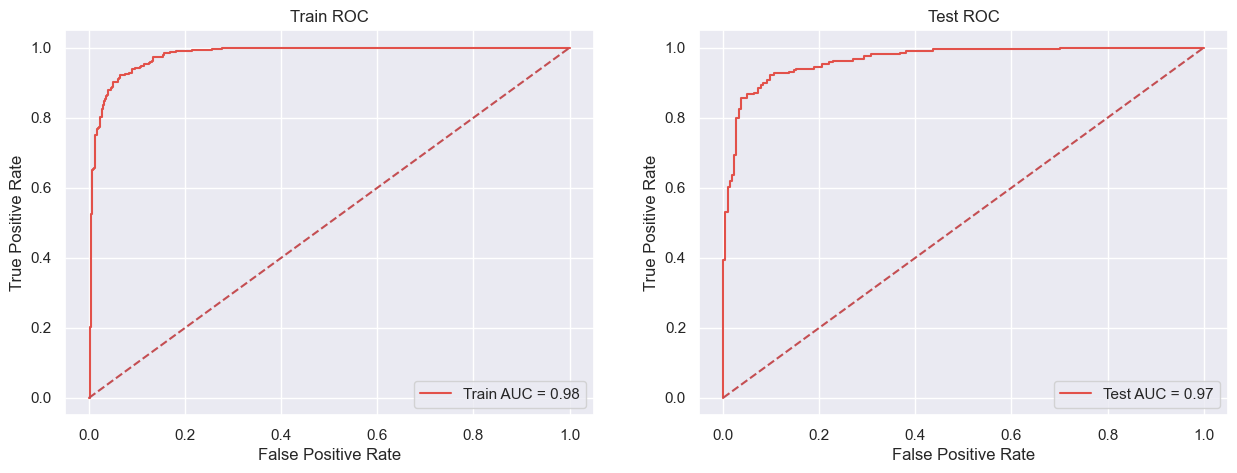

In [5]:
# plot roc curve for model1 for training and test sets using sns

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# training set
y_train_pred = model1.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
roc_auc = auc(fpr, tpr)
ax[0].plot(fpr, tpr, label=f"Train AUC = {roc_auc:.2f}")
ax[0].plot([0, 1], [0, 1], "r--")
ax[0].set_title("Train ROC")
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].legend(loc="lower right")

# test set
y_test_pred = model1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
ax[1].plot(fpr, tpr, label=f"Test AUC = {roc_auc:.2f}")
ax[1].plot([0, 1], [0, 1], "r--")
ax[1].set_title("Test ROC")
ax[1].set_xlabel("False Positive Rate")
ax[1].set_ylabel("True Positive Rate")
ax[1].legend(loc="lower right")

plt.show()


### Q1.5 - <span style="color:red">[8]</span> - Fine-Tuning
The default threshold value in Sklearn Logistic Regression is 0.5. You are told by the stakeholders that the maximum false positive rate (FPR) which this project can tolerate is 0.2. Based on this information, choose the threshold value which leads to the highest Recall given $FPR \leq 0.2$. Use the training set to find this threshold value. What would be your new threshold?

In [6]:
# if tolerated FPR <= 0.2  get the threshold for model1 using training set
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
threshold = thresholds[np.argmax(tpr - fpr)]
print(f"Threshold for model1: {threshold:.3f}")


Threshold for model1: 0.521


### Q1.6 - <span style="color:red">[6]</span> - Evaluation of Fine-Tuned Model: Accuracy Score
Report accuracy scores of the model based on the new threshold (*i.e.*, found in the previous question) for both the training and test sets.

In [7]:
# get accuracy for model1 using training and test set
y_train_pred = (y_train_pred > threshold).astype(int)
y_test_pred = (y_test_pred > threshold).astype(int)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {test_accuracy:.3f}")


Train accuracy: 0.927
Test accuracy: 0.913


### Q1.7 - <span style="color:red">[8]</span> - Evaluation of Fine-Tuned Model: Confusion Matrix
Report the confusion matrix over the test set for both the default and new thresholds. Going from the default to new threshold, by what percentage the sum of false negatives and false positives changed? Did this sum decreased or increased?

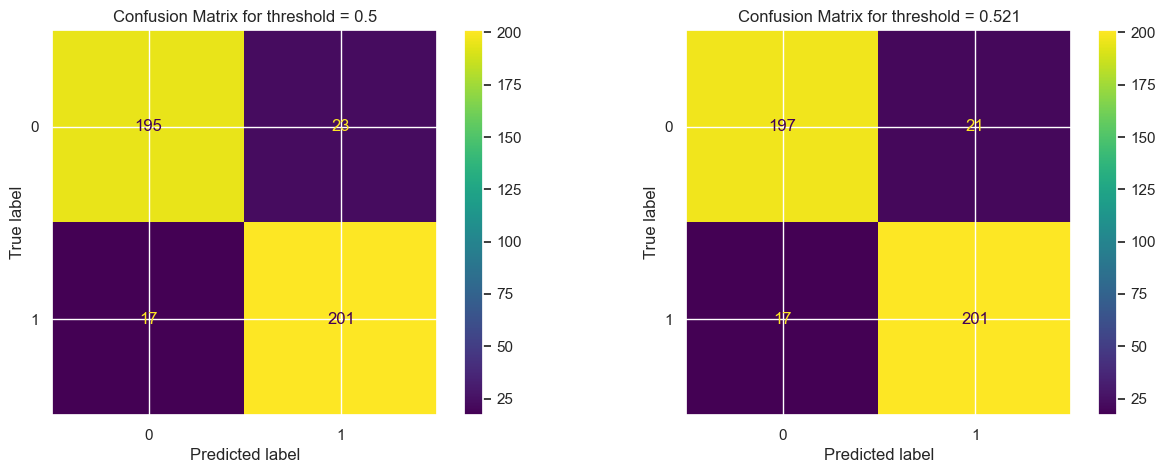

False Positive Rate for threshold = 0.5: 0.106
False Negative Rate for threshold = 0.5: 0.078
False Positive Rate for threshold = 0.521: 0.096
False Negative Rate for threshold = 0.521: 0.078
Percentage change in FPR: -8.70%
Percentage change in FNR: 0.00%

The percentage of fpr has decreased using the new threshold and the percentage of fnr has remained the same, 
so the new threshold is better than the old threshold for model1 because it has decreased the incorrect predictions for the true negatives that were falsley predicted as being positive


In [8]:
# confusion matrix for model1 using test set
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# old threshold (0.5)
cm1 = confusion_matrix(y_test, model1.predict(X_test))
ConfusionMatrixDisplay(cm1).plot(ax=ax[0])
ax[0].set_title("Confusion Matrix for threshold = 0.5")

# new threshold (0.521)
cm2 = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm2).plot(ax=ax[1])
ax[1].set_title("Confusion Matrix for threshold = 0.521")

plt.show()

# .5 threshold
fpr = cm1[0, 1] / (cm1[0, 0] + cm1[0, 1])
fnr = cm1[1, 0] / (cm1[1, 0] + cm1[1, 1])

print(f"False Positive Rate for threshold = 0.5: {fpr:.3f}")
print(f"False Negative Rate for threshold = 0.5: {fnr:.3f}")

# .521 threshold (new)
fpr = cm2[0, 1] / (cm2[0, 0] + cm2[0, 1])
fnr = cm2[1, 0] / (cm2[1, 0] + cm2[1, 1])

print(f"False Positive Rate for threshold = 0.521: {fpr:.3f}")
print(f"False Negative Rate for threshold = 0.521: {fnr:.3f}")

# percentage change in fpr and fnr for model1 when changing between a threshold of 0.5 to 0.521
fpr_change = ((cm2[0, 1] - cm1[0, 1]) / cm1[0, 1]) * 100
fnr_change = ((cm2[1, 0] - cm1[1, 0]) / cm1[1, 0]) * 100

print(f"Percentage change in FPR: {fpr_change:.2f}%")
print(f"Percentage change in FNR: {fnr_change:.2f}%")

print(
    "\nThe percentage of fpr has decreased using the new threshold and the percentage of fnr has remained the same, \nso the new threshold is better than the old threshold for model1 because it has decreased the incorrect predictions for the true negatives that were falsley predicted as being positive"
)


---
## Question 2 - <span style="color:red">[30]</span> - Uncertainty Quantification
We have an apparatus which detects and records the amplitude of certain input signals. We have done repeated experiments with this device and have recorded the measured amplitudes of each input signal in "Data_Q2.csv", which has the following attributes:

|Column Index | Attribute | Description |
| --- | --- | --- |
| 0|Signal|Input physical signal|
| 1|Amplitude|Measured amplitude of input signal|

### Q2.1 - <span style="color:red">[20]</span> - Bootstrap
Using a confidence level of $97\%$, and a resampling number of $5000$, compute and report the **bootstrap** confidence interval (CI) of the **median** amplitude for each input signal.

Feel free to use `scipy.stats.bootstrap` to compute the bootstrap confidence intervals.

In [9]:
from scipy.stats import bootstrap

# Load the dataset
df2 = pd.read_csv("Data_Q2.csv")

# Parameters for the bootstrap
confidence_level = 0.97
n_resamples = 5000

# Initialize a dictionary to store the bootstrap results for each unique signal
bootstrap_cis = {}

# Loop through each unique signal in the DataFrame
for signal in df2["Signal"].unique():
    signal_data = df2[df2["Signal"] == signal]["Amplitude"].to_numpy()

    # Compute the bootstrap confidence interval
    res = bootstrap(
        (signal_data,),
        np.median,
        n_resamples=n_resamples,
        confidence_level=confidence_level,
        method="percentile",
    )

    # Store the CI
    bootstrap_cis[signal] = res.confidence_interval


# Display the results
for signal, ci in bootstrap_cis.items():
    print(f"Signal: {signal}, CI: {ci}")


Signal: Signal1, CI: ConfidenceInterval(low=4.4916505249999996e-08, high=8.99934446e-08)
Signal: Signal2, CI: ConfidenceInterval(low=5.18506507e-08, high=6.87962089e-08)
Signal: Signal3, CI: ConfidenceInterval(low=2.93742618e-08, high=5.53867905e-08)
Signal: Signal4, CI: ConfidenceInterval(low=1.130799395e-08, high=4.09678851e-08)
Signal: Signal5, CI: ConfidenceInterval(low=6.7505912e-09, high=3.52411524e-08)


### Q2.2 - <span style="color:red">[10]</span> - CI Plot
Plot the median of amplitudes for each signal (*i.e.*, x-axis for signal and y-axis for the median of signal amplitude). Your plot must also show the bootstrap CIs' upper and lower bounds. Based on your calculated CIs, for which signal the apparatus is least certain?

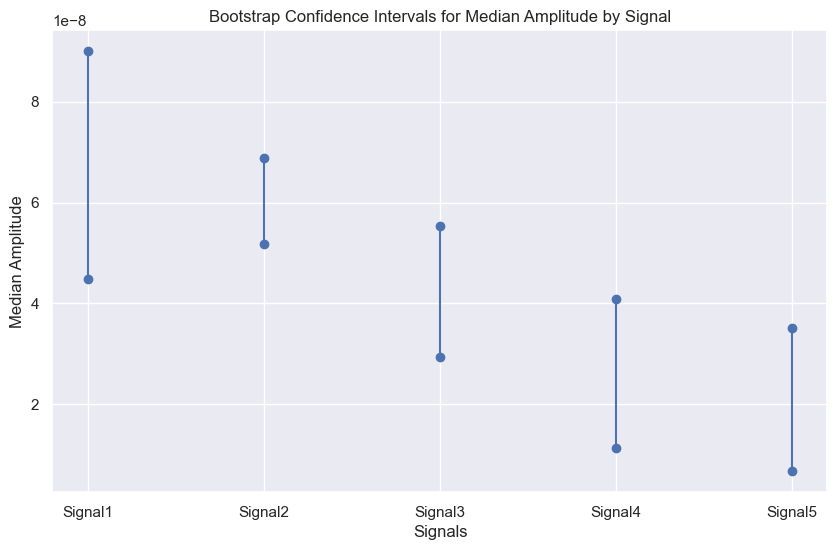

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

for signal, ci in bootstrap_cis.items():
    ax.plot([signal, signal], [ci.low, ci.high], marker="o", color="b")

ax.set_xlabel("Signals")
ax.set_ylabel("Median Amplitude")
ax.set_title("Bootstrap Confidence Intervals for Median Amplitude by Signal")

plt.show()


---
$$ The\;End $$